In [2]:
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Create the New Training Data with 2 new columns of only values 0 or 1

In [ ]:
## Create the two new columns "SUBJlang01" and "SUBJopin01" with only values of 0 or 1.
# Importiert pandas unter dem Synonym pd
import pandas as pd
    
# Der Pfad für die Dateien wird hier als Variable erstellet, damit man ihn nur einmal aufschreiben muss und auch bei Änderungen nur eine Stelle hat die geändert werden muss.
file_path = '/content/gdrive/MyDrive/Praxisprojekt/'

# Das Mounten von Google-Drive passiert hier nochmal damit man diese Zelle für sich alleine ausführen kann
from google.colab import drive
drive.mount('/content/gdrive')

# liest die Datei ein. Dabei wird nur der Inhalt vom Blatt 'sentences' eingelesen
old_data = pd.read_excel(file_path + 'Trainingdata.xlsx', sheet_name='sentences')

df_2 = pd.read_excel(file_path + 'Trainingdata.xlsx', sheet_name='sentences', usecols= ["SUBJlang", "SUBJopin"])
df_lists = df_2.values.tolist()
u1_list = []
u2_list = []
for s_list in df_lists:
    input_a = s_list[0]
    input_b = s_list[1]

#Merge values of 1 and 3 in SUBJlang as 1, otherwise as 0.
    if input_a >= 5:
      u1 = 0
    else:
      u1 = 1
#Merge values of 5 and 3 in SUBJopin as 1, otherwise as 0.
    if input_b <= 1:
      u2 = 0
    else:
      u2 = 1 

    u1_list.append(u1)
    u2_list.append(u2)

#Create the two new columns with only values of 0 or 1.
col_name=old_data.columns.tolist()
col_name.append('SUBJlang01')
col_name.append('SUBJopin01')

old_data=old_data.reindex(columns=col_name) 

old_data['SUBJlang01']=u1_list
old_data['SUBJopin01']=u2_list

old_data.to_excel(file_path + 'TrainingdataNew.xlsx', index=False, sheet_name='sentences')
#df2.to_excel(file_path + 'TrainingdataTest.xlsx', index=False, sheet_name='sentences')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).



# Daten in Training-, Test- und Validation-Menge aufteilen


In [ ]:
# Importiert pandas unter dem Synonym pd
import pandas as pd
    
# Der Pfad für die Dateien wird hier als Variable erstellet, damit man ihn nur einmal aufschreiben muss und auch bei Änderungen nur eine Stelle hat die geändert werden muss.
file_path = '/content/gdrive/MyDrive/Praxisprojekt/'

# Das Mounten von Google-Drive passiert hier nochmal damit man diese Zelle für sich alleine ausführen kann
from google.colab import drive
drive.mount('/content/gdrive')

# liest die Datei ein. Dabei wird nur der Inhalt vom Blatt 'sentences' eingelesen
test_data = pd.read_excel(file_path + 'TrainingdataNew.xlsx', sheet_name='sentences')

# Zählt die Anzahl an verschiedenen IDs. Das ist auch die Anzahl an Artikeln die wir zum Testen haben. Wir sollen die Testdaten anhand der Artikel teilen nicht anhand der Sätze.
ids = test_data.ID.unique()

# In den nächsten drei Zeilen werden alle Sätze eines Artikels in einem Listen Element gespeichert. Das heißt das alle Sätze die zu dem Artikel mit der ID '1A-B' gehören im selbem Listenelement liegen
texts = []
for i in ids:
    # Pandas bietet die Möglichkeit Daten in einem Dateframe zu selectieren indem man ihm sagt: "Selektiere alle Zeilen bei denen die ID = i ist".
    # ID ist dabei eine Spalte des Dataframes
    texts.append(test_data[test_data.ID == i])

# Anzahl der Artikel auslesen
id_count = len(texts)

# Die Prozentzahlen der Trainings-, Test- und Validierungs-Menge sind hier alle eigene Variablen, damit man sie nur an einer Stelle ändern muss, wenn man eine andere Aufteilung der Daten haben möchte.
train_percent = .7
test_percent = .15
validation_percent = .15

# Hier wird die Anzahl der Elemente der jeweiligen Menge bestimmt.
# Man muss das ganze zu einem int casten, weil die Prozentzahlen floats sind.
train_count = int(id_count * train_percent)
test_count = int(id_count * test_percent)
validation_count = int(id_count * validation_percent)

# Hier wird mit der Slice-Notation (siehe hier für mehr Informationen https://docs.python.org/3/tutorial/datastructures.html) genutzt um die richtigen Daten zu erhalten
train_set = texts[:train_count]
test_set = texts[train_count: (train_count + test_count)]
validation_set = texts[(train_count + test_count):]

# Als nächstes wird für die Trainings-, Test- und Validierungs-Menge jeweils ein eigener Dataframe angelegt.
# Dies tut man damit man ihn einfach mit Pandas speichern kann.
train_frame = train_set[0]
for train_index in range(1, len(train_set)):
    train_frame = train_frame.append(train_set[train_index])
    
test_frame = test_set[0]
for test_index in range(1, len(test_set)):
    test_frame = test_frame.append(test_set[test_index])
    
validation_frame = validation_set[0]
for validation_index in range(1, len(validation_set)):
    validation_frame = validation_frame.append(validation_set[validation_index])

# Jetzt werden die Daten an den übergebenen Pfad geschrieben
train_frame.to_excel(file_path + 'Trainingdata_train.xlsx', index=False, sheet_name='sentences')
test_frame.to_excel(file_path + 'Trainingdata_test.xlsx', index=False, sheet_name='sentences')
validation_frame.to_excel(file_path + 'Trainingdata_validation.xlsx', index=False, sheet_name='sentences')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# Count Frencuency of Different Values

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data_train_Sentiment-Values:
5    1418
3     519
1     457
Name: SUBJlang, dtype: int64


Text(0.5, 1.0, 'data_train_Sentiment-Values')

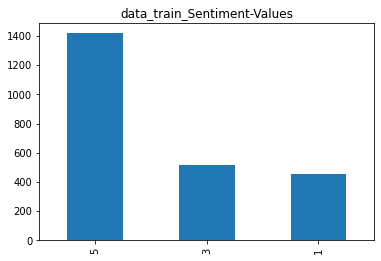

In [ ]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/Praxisprojekt/'
train_data = pd.read_excel(file_path + 'Trainingdata_train.xlsx', sheet_name='sentences')
test_data = pd.read_excel(file_path + 'Trainingdata_test.xlsx', sheet_name='sentences')
validation_data = pd.read_excel(file_path + 'Trainingdata_validation.xlsx', sheet_name='sentences')

#print(train_data['SUBJlang'])
#print(train_data['SUBJlang'].head())
print("data_train_Sentiment-Values:")
print(pd.value_counts(train_data['SUBJlang']))
pd.value_counts(train_data['SUBJlang']).plot.bar()
plt.title("data_train_Sentiment-Values")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data_test_Sentiment-Values:
5    313
1    137
3     62
Name: SUBJlang, dtype: int64


Text(0.5, 1.0, 'data_test_Sentiment-Values')

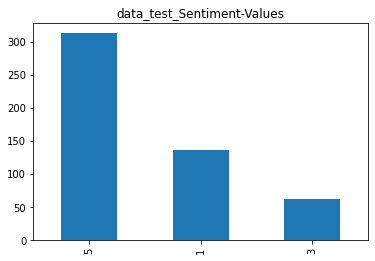

In [ ]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/Praxisprojekt/'

train_data = pd.read_excel(file_path + 'Trainingdata_train.xlsx', sheet_name='sentences')
test_data = pd.read_excel(file_path + 'Trainingdata_test.xlsx', sheet_name='sentences')
validation_data = pd.read_excel(file_path + 'Trainingdata_validation.xlsx', sheet_name='sentences')

print("data_test_Sentiment-Values:")
print(pd.value_counts(test_data['SUBJlang']))

pd.value_counts(test_data['SUBJlang']).plot.bar()
plt.title("data_test_Sentiment-Values")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data_validation_Sentiment-Values:
5    360
3     25
1     11
Name: SUBJlang, dtype: int64


Text(0.5, 1.0, 'data_validation_Sentiment-Values')

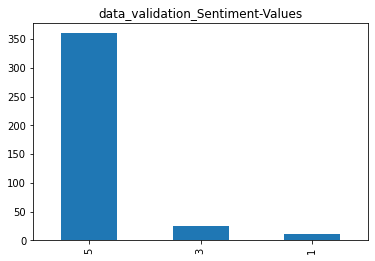

In [ ]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/Praxisprojekt/'

train_data = pd.read_excel(file_path + 'Trainingdata_train.xlsx', sheet_name='sentences')
test_data = pd.read_excel(file_path + 'Trainingdata_test.xlsx', sheet_name='sentences')
validation_data = pd.read_excel(file_path + 'Trainingdata_validation.xlsx', sheet_name='sentences')

print("data_validation_Sentiment-Values:")
print(pd.value_counts(validation_data['SUBJlang']))

pd.value_counts(validation_data['SUBJlang']).plot.bar()
plt.title("data_validation_Sentiment-Values")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data_train_Opinion-Values:
1    1813
3     311
5     269
0       1
Name: SUBJopin, dtype: int64


Text(0.5, 1.0, 'data_train_Opinion-Values')

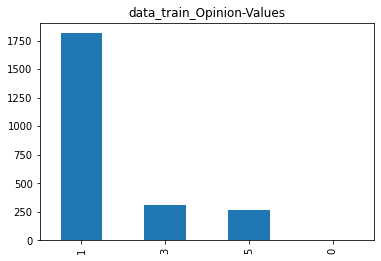

In [ ]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/Praxisprojekt/'

train_data = pd.read_excel(file_path + 'Trainingdata_train.xlsx', sheet_name='sentences')
test_data = pd.read_excel(file_path + 'Trainingdata_test.xlsx', sheet_name='sentences')
validation_data = pd.read_excel(file_path + 'Trainingdata_validation.xlsx', sheet_name='sentences')

print("data_train_Opinion-Values:")
print(pd.value_counts(train_data['SUBJopin']))

pd.value_counts(train_data['SUBJopin']).plot.bar()
plt.title("data_train_Opinion-Values")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data_test_Opinion-Values:
1    344
5     87
3     81
Name: SUBJopin, dtype: int64


Text(0.5, 1.0, 'data_test_Opinion-Values')

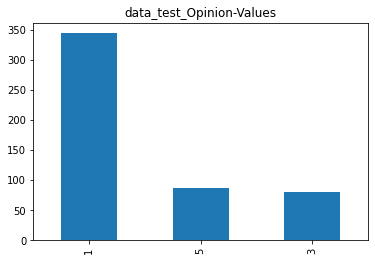

In [ ]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/Praxisprojekt/'

train_data = pd.read_excel(file_path + 'Trainingdata_train.xlsx', sheet_name='sentences')
test_data = pd.read_excel(file_path + 'Trainingdata_test.xlsx', sheet_name='sentences')
validation_data = pd.read_excel(file_path + 'Trainingdata_validation.xlsx', sheet_name='sentences')

print("data_test_Opinion-Values:")
print(pd.value_counts(test_data['SUBJopin']))

pd.value_counts(test_data['SUBJopin']).plot.bar()
plt.title("data_test_Opinion-Values")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
data_validation_Opinion-Values:
1    364
3     23
5      9
Name: SUBJopin, dtype: int64


Text(0.5, 1.0, 'data_validation_Opinion-Values')

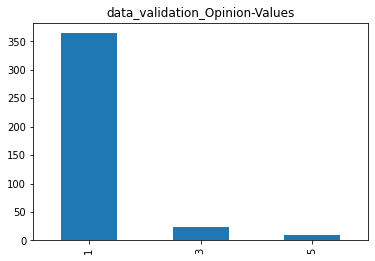

In [ ]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')

file_path = '/content/gdrive/MyDrive/Praxisprojekt/'

train_data = pd.read_excel(file_path + 'Trainingdata_train.xlsx', sheet_name='sentences')
test_data = pd.read_excel(file_path + 'Trainingdata_test.xlsx', sheet_name='sentences')
validation_data = pd.read_excel(file_path + 'Trainingdata_validation.xlsx', sheet_name='sentences')

print("data_validation_Opinion-Values:")
print(pd.value_counts(validation_data['SUBJopin']))

pd.value_counts(validation_data['SUBJopin']).plot.bar()
plt.title("data_validation_Opinion-Values")

# Pipeline erzeugen und customized Transformer

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.base import BaseEstimator, TransformerMixin

# Man kann auch mehrere hintereinander machen

class SentenceTransformer(BaseEstimator, TransformerMixin):
    
    def __init(self):
        print('init() called')
        
    def fit(self, X, y=None):
        print('fit() called')
        return self
    
    def transform(self, X, y=None):
        print('transformed called')
        # Hier können wir dann unsere Sätze bearbeiten und zu numerischen Werten machen
        return X
    
    

from sklearn import linear_model
    
print('create Pipline')
pipe = Pipeline(steps=[
    ('sentence_trans', SentenceTransformer()),
    ('sgd', linear_model.SGDClassifier())
])

import sklearn.pipeline

pipe2 = sklearn.pipeline.make_pipeline(SentenceTransformer(), linear_model.LinearRegression())

from sklearn import datasets
iris = datasets.load_iris()

pipe.fit(iris.data, iris.target)
pipe2.fit(iris.data, iris.target)


create Pipline
fit() called
transformed called
fit() called
transformed called


Pipeline(memory=None,
         steps=[('sentencetransformer', SentenceTransformer()),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

# Daten preprocessen

In [ ]:
#https://blog.cambridgespark.com/tutorial-preprocessing-text-data-a8969189b779
import pandas as pd
import re
import sklearn
import string
import nltk
import spacy
nltk.download('stopwords')



data = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_train.xlsx', sheet_name = 'sentences')
sentences = data['Sentence'].tolist()
sentences = list((str(s) for s in sentences))
print("Sentences:")
print(sentences)

#muss vom generator object zurück zur liste gemacht werden
sentences = list((s.lower() for s in sentences))
print("Lower-case Sentences:")
print(sentences)

table = str.maketrans('', '', string.punctuation)
sentences = [s.translate(table) for s in sentences]
print("Sentences without punctuation:")
print(sentences)

#zahlen rausfiltern, wird von named entities schon übernommen
#sentences = [re.sub(r'\d+', 'num', s) for s in sentences]
#print("Sentences with 'num' instead of numbers:")
#print(sentences)


#remove named entities
nlp = spacy.load("en_core_web_sm")
sentences2 = []
for s in sentences:
  text_no_namedentities = []
  document = nlp(s)
  for item in document:
    if item.ent_type: #falls es ein name ist
      #text_no_namedentities.append('ne')        # durch ne ersetzen
      pass                                        # oder ganz auslassen
    else:
        text_no_namedentities.append(item.text)
  sentences2.append(" ".join(text_no_namedentities))
#print("Sentences with 'ne' instead of named entities")
print("Sentences without named entities")
print(sentences2)

stopwords = set(nltk.corpus.stopwords.words('english')+ ['liam', 'hemsworth', 'cyrus'])       #diese drei werden nicht als named entities erkannt, daher werden sie hier rausgefiltert
sentences2 = [[word for word in s.split() if word not in stopwords] for s in sentences2]
print("Sentences without stopwords:")
print(sentences2)

stemmer = nltk.stem.PorterStemmer()
sentences2 = [[stemmer.stem(word) for word in s] for s in sentences2]
print("Sentences with stemming:")
print(sentences2)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Sentences:
['miley and liam fighting false rumors swirl that theyre in a feud over a supposed prenup', 'are miley cyrus and liam hemsworth fighting', 'a new report claims that cyrus and hemsworth had a huge fight over their supposed prenup while they were making their wedding plans', 'according to the report cyrus 24 and hemsworth 27 have been planning their wedding in the himalayan mountains this summer', 'but there has reportedly been tension between them over having a prenup', 'cyrus reportedly told hemsworth she wanted him to sign a prenup before they got married so she could protect her estimated 200 million net worth', 'and hemsworth was reportedly shocked and annoyed with miley and accused her of not trusting him', 'are miley and liam getting married this summer click here for details', 'sources say miley cyrus and liam hemsworth are fighting over a prenup photo

# Bag-of-Words: Dictionary aus Text erzeugen

In [ ]:
#INPUT: Eine Liste mit bereits in Wörtern geteilten Sätzen
#WANTED OUTPUT: Eine Liste mit Dictionaries
#PREDICTED CODE LENGTH: Like 5 lines or something idk 
import pandas as pd
data = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_train.xlsx', sheet_name = 'sentences')     #nur training_train verwenden
sentences = data['Sentence'].tolist()

#primitive Funktion, um Sätze in Wörter (ohne Satzzeichen) zu splitten
#tötet Umlaute und andere Sonderzeichen
#sollte definitiv noch ersetzt werden
import re
def makeWordList(s):
  #non-alphanumerische Zeichen durch Leerzeichen ersetzen und dann an Leerzeichen splitten
  return re.sub("[^\w]", " ", s).split()

#Variante, die eine Liste von Sätzen annimmt
def makeWordListMulti(s):
  result = []
  for sentence in s:
    result = result + makeWordList(sentence)
  return result

#Dictionary aus Wörterliste erstellen
from collections import Counter
def makeDictionary(words):
 c = Counter(words)
 dic = {}
 for key in c:
  dic[key] = c[key]
 return dic



#vvvvvvvvvvvvvvvvvv AB HIER TESTING vvvvvvvvvvvvvvvvvv

#Teste am ersten Satz im Trainingsset
wordList = makeWordList(sentences[0])
print("Created list of words:")
print(wordList)

dic = makeDictionary(wordList)
print("Created dictionary:") 
print(dic)

print("Teste Variante mit ganzen Artikeln...")

ids = data.ID.unique()
articles = []
for id in ids:
 #Gruppiere nach ID, dann nimm nur die Strings als Liste
 articles.append(data[data.ID == id]['Sentence'].tolist())

#Teste wieder am ersten Artikel im Trainingsset
wordList = makeWordListMulti(articles[0])
dic = makeDictionary(wordList)
print("Large Dictionary incoming:")
print(dic)

# Chi-square Test


In [ ]:
import numpy as numpy
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

data = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_train.xlsx', sheet_name = 'sentences')     #nur training_train verwenden

label_encoder = LabelEncoder()
data['SUBJopin'] = label_encoder.fit_transform(data['SUBJopin'])
data['SUBJlang'] = label_encoder.fit_transform(data['SUBJlang'])

sentence_score = {}
sentence_number = 0
for sentence in sentences:
  sentence_number = sentence_number + 1 
  score = 0
  sentence_wordList = makeWordList(sentence)
  for word in sentence_wordList:
    if word in dic:
      score = score + dic[word]
      
  print("The score of the sentence: " + str(sentence_number) + " is: " + str(score))





# Basline Classifier Vader

In [61]:
## gut für social media, twitter
import nltk
import pandas as pd
nltk.download('vader_lexicon')
nltk.download('movie_reviews')
nltk.download('punkt')
from sklearn.metrics import accuracy_score
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

# Datensätze vorbereiten
data_train = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_train.xlsx', sheet_name = 'sentences')
data_test = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_test.xlsx', sheet_name = 'sentences')
sentences = data_train['Sentence'].tolist()
#sentences = data_test['Sentence'].tolist()
sentences = list((str(s) for s in sentences))

# vader sentiment intensity analyser erstellen
analyser = SIA()

# Datenframe mit den Sätzen und ihren sentiment values erstellen
df = pd.DataFrame({"sentences" : sentences, "sentiment label" : data_train['SUBJlang01']})
#df = pd.DataFrame({"sentences" : sentences, "sentiment label" : data_test['SUBJlang01']})


# für jeden Satz die vader sentiment scores berechnen
df['neg'] = df['sentences'].apply(lambda x:analyser.polarity_scores(x)['neg'])
df['neu'] = df['sentences'].apply(lambda x:analyser.polarity_scores(x)['neu'])
df['pos'] = df['sentences'].apply(lambda x:analyser.polarity_scores(x)['pos'])
df['compound'] = df['sentences'].apply(lambda x:analyser.polarity_scores(x)['compound'])


# Ergebniswerte kategorisieren in 0 neutral und 1 sentimental
# ab 75% neutral ist es 0, ansonsten 1
df['sentiment value'] = 0
df.loc[df.neu<0.75, 'sentiment value']=1
df.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)

# accuracy berechnen
print("accuracy vader: {0}" .format(accuracy_score(df['sentiment label'], df['sentiment value'])))
print("precision vader sentiment: {0}" .format(precision_score(df['sentiment label'], df['sentiment value'], average='weighted')))
print("recall vader sentiment: {0}" .format(recall_score(df['sentiment label'], df['sentiment value'], average='weighted')))
print("f-score vader sentiment: {0}" .format(f1_score(df['sentiment label'], df['sentiment value'], average='weighted')))


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
accuracy vader: 0.6165413533834586
precision vader sentiment: 0.6038300849143716
recall vader sentiment: 0.6165413533834586
f-score vader sentiment: 0.6005525921850724


# Baseline Classifier TextBlob

In [60]:
import nltk
import pandas as pd
from textblob import TextBlob
from textblob import Blobber
from textblob.sentiments import NaiveBayesAnalyzer
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#blob = TextBlob("This restaurant was great, but I'm not sure if I'll go there again.")
#blob.sentiment

# Datensätze vorbereiten
data_train = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_train.xlsx', sheet_name = 'sentences')
data_test = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_test.xlsx', sheet_name = 'sentences')
sentences = data_train['Sentence'].tolist()
#sentences = data_test['Sentence'].tolist()
sentences = list((str(s) for s in sentences))

# Datenframe mit den Sätzen und deren Sentiment- und Opinion-Werte erstellen 
df = pd.DataFrame({"sentences" : sentences, "sentiment label" : data_train['SUBJlang01'], "opinion label" : data_train['SUBJopin01']})

# TextBlob-Werte ausrechnen 
df['polarity'] = df['sentences'].apply(lambda x: TextBlob(x).sentiment[0])
df['subjectivity'] = df['sentences'].apply(lambda x: TextBlob(x).sentiment[1])

## sentiment label, opinion label: 0 = neutral
## polarity: 0 = neutral, sonst positiver oder negativer wert für Sentiment
## subjectivity: 0 = objectiv (neutral), 1 = subjectiv
## range von +- 25% für neutral bei sentiment, 50% bei opinion
df['sentiment value'] = 0
df.loc[df.polarity>0.25, 'sentiment value']=1
df.loc[df.polarity<-0.25, 'sentiment value']=1
df['opinion value'] = 0
df.loc[df.subjectivity>0.50, 'opinion value']=1
df.style.background_gradient(cmap='RdYlGn', axis=None, low=0.4, high=0.4)

# accuracy berechnen
print("accuracy textblob sentiment: {0}" .format(accuracy_score(df['sentiment label'], df['sentiment value'])))
print("precision textblob sentiment: {0}" .format(precision_score(df['sentiment label'], df['sentiment value'], average='weighted')))
print("recall textblob sentiment: {0}" .format(recall_score(df['sentiment label'], df['sentiment value'], average='weighted')))
print("f-score textblob sentiment: {0}" .format(f1_score(df['sentiment label'], df['sentiment value'], average='weighted')))
print("----------------------------------------------------------")
print("accuracy textblob opinion: {0}" .format(accuracy_score(df['opinion label'], df['opinion value'])))
print("precision textblob opinion: {0}" .format(precision_score(df['opinion label'], df['opinion value'], average='weighted')))
print("recall textblob opinion: {0}" .format(recall_score(df['opinion label'], df['opinion value'], average='weighted')))
print("f-score textblob opinion: {0}" .format(f1_score(df['opinion label'], df['opinion value'], average='weighted')))

accuracy textblob sentiment: 0.5760233918128655
precision textblob sentiment: 0.5502084026688221
recall textblob sentiment: 0.5760233918128655
f-score textblob sentiment: 0.5444077043154417
----------------------------------------------------------
accuracy textblob opinion: 0.6537176274018379
precision textblob opinion: 0.672020967560039
recall textblob opinion: 0.6537176274018379
f-score textblob opinion: 0.6620134315095486


# Teile zusammenführen

In [ ]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import re
import sklearn
import string
import nltk
nltk.download('stopwords')
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score



class PreprocessorTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
      pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, data, y=None):
        sentences = data['Sentence'].tolist()
        sentences = list((str(s) for s in sentences))

        # Alles klein schreiben
        # muss vom generator object zurück zur Liste gemacht werden
        sentences = list((s.lower() for s in sentences))

        # Satzzeichen entfernen
        table = str.maketrans('', '', string.punctuation)
        sentences = [s.translate(table) for s in sentences]

        # ersetzt Zahlen durch den String "num"
        #sentences = [re.sub(r'\d+', 'num', s) for s in sentences]

        #remove named entities
        nlp = spacy.load("en_core_web_sm")
        sentences2 = []
        for s in sentences:
          text_no_namedentities = []
          document = nlp(s)
          for item in document:
            if item.ent_type: #falls es ein name ist
              #text_no_namedentities.append('ne')        # durch ne ersetzen
              pass                                        # oder ganz auslassen
            else:
              text_no_namedentities.append(item.text)
          sentences2.append(" ".join(text_no_namedentities))

        # entfernt stopwords
        stopwords = set(nltk.corpus.stopwords.words('english')+ ['liam', 'hemsworth', 'cyrus'])
        sentences2 = [[word for word in s.split() if word not in stopwords] for s in sentences2]
        
        # führte Wort-Stemming durch
        stemmer = nltk.stem.PorterStemmer()
        sentences2 = [[stemmer.stem(word) for word in s] for s in sentences2]

        return sentences2
    



class BagOfWordsForEachSentenceTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
      pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, sentences, y=None):
        print('transformed called')
        dics = []

        #für jeden Satz wird ein Dictionary konstruiert
        for s in sentences:
          c = Counter(s)
          dic = []
          for key in c:
            dic[key]=(c[key])
          dics.append(dic)

        return (sentences, dics)
    
    
class BagOfWordsTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        # Kann man eventuell besser machen und muss man nicht so machen
        self.bigdict = {}
        self.training = True
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, sentences, y=None):
        if self.training:
          from collections import Counter
          self.bigdict = {}
          for s in sentences:
            c = Counter(s)
            for key in c:
              if key in self.bigdict:
                self.bigdict[key] = self.bigdict[key] + c[key]
              else:
                self.bigdict[key] = 1
          self.training = False

        return (sentences, self.bigdict)


class SentenceToVectorTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
      pass
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, sentence_dict_tuple, y=None):
        # Tupel zerlegen
        sentence_fragments, dicts = sentence_dict_tuple
        sorted_keys = [key for key in dicts.keys()]
        retval = []
        for sentence_fragment in sentence_fragments:
          vec = []
          for key in sorted_keys:
            if key in sentence_fragment:
              vec.append(1)
            else:
              vec.append(0)
          retval.append(vec)
        return retval


# Erstelle Pipeline
pipe_LR = sklearn.pipeline.make_pipeline(PreprocessorTransformer(), BagOfWordsTransformer(), SentenceToVectorTransformer(), sklearn.linear_model.LogisticRegression())
pipe_NB = sklearn.pipeline.make_pipeline(PreprocessorTransformer(), BagOfWordsTransformer(), SentenceToVectorTransformer(), GaussianNB())

# Lade Datensätze
data_train = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_train.xlsx', sheet_name = 'sentences')
data_train.drop(['SUBJindl', 'SUBJsrce', 'SUBJrhet', 'SUBJster', 'SUBJspee', 'SUBJinspe', 'SUBJprop', 'SUBJpolit'], axis=1, inplace=True)

data_test = pd.read_excel('/content/gdrive/MyDrive/Praxisprojekt/Trainingdata_test.xlsx', sheet_name = 'sentences')
data_test.drop(['SUBJindl', 'SUBJsrce', 'SUBJrhet', 'SUBJster', 'SUBJspee', 'SUBJinspe', 'SUBJprop', 'SUBJpolit'], axis=1, inplace=True)


print("results for sentiment:")
y_lang = data_train.SUBJlang.to_numpy().astype(int)
y_lang_test = data_test.SUBJlang.to_numpy()

pipe_LR.fit(data_train, y_lang)
y_pred_LR = pipe_LR.predict(data_test)
accuracy_LR = accuracy_score(y_pred_LR, y_lang_test)
print(f'Accuracy logistic Regression: {accuracy_LR}')

pipe_NB.fit(data_train, y_lang)
y_pred_NB = pipe_NB.predict(data_test)
accuracy_NB = accuracy_score(y_pred_NB, y_lang_test)
print(f'Accuracy Naive Bayes: {accuracy_NB}')


print("results for opinion:")
y_opin = data_train.SUBJopin.to_numpy().astype(int)
y_opin_test = data_test.SUBJopin.to_numpy()

pipe_LR.fit(data_train, y_opin)
y_pred_LR = pipe_LR.predict(data_test)
accuracy_LR = accuracy_score(y_pred_LR, y_opin_test)
print(f'Accuracy logistic Regression: {accuracy_LR}')

pipe_NB.fit(data_train, y_opin)
y_pred_NB = pipe_NB.predict(data_test)
accuracy_NB = accuracy_score(y_pred_NB, y_opin_test)
print(f'Accuracy Naive Bayes: {accuracy_NB}')